In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid') # sns에 흰색 그리드 유지
import missingno # 결측치 시각화

# KFold (교차 검증을 사용하기 위해)
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증 데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가 함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier


# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import  XGBRegressor

# 머신러닝 알고리즘 - 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 머신러닝 알고리즘 - 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝 알고리즘 
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# 다중분류를 위한 원핫 인코더
from keras.utils import to_categorical

# 학습 자동 중단
from keras.callbacks import EarlyStopping

# 모델 저장
from keras.callbacks import ModelCheckpoint

# 저장된 딥러닝 모델 불러오기
from keras.models import load_model

# 저장
import pickle

# 시간 모듈
import time

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우용
plt.rcParams['font.family'] = 'AppleGothic'   # 맥용
plt.rcParams['font.size'] = 10                 # 폰트 크기
plt.rcParams['figure.figsize'] = 10,8          # 그래프 크기
plt.rcParams['axes.unicode_minus'] = False     # - 기호 깨짐 방지


# 경고 메시지가 안나오게 하기
import warnings
warnings.filterwarnings('ignore')

### 데이터 불러오기

In [2]:
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')

### 데이터 프레임 정보확인

In [3]:
# 결측치 확인
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# 결측치 확인
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- train_df의 결측치
Age 177
Cabin 687
Emb 2

- test_df의 결측치
Age 86
Fare 1
Cabin 327

### 데이터 전처리

In [5]:
# 두 데이터프레임을 합친다.
data = pd.concat((train_df, test_df))
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
# 인덱스 번호 재설정
data = data.reset_index(drop=True)

In [7]:
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### PassengerID
- 승객 일련 번호
- 1부터 1씩 증가시킨 값으로 의미가 없다.
- 사용하지 않을 것

### Pclass
- 승객등급

In [8]:
# 결측치 확인
data['Pclass'].isna().sum()

0

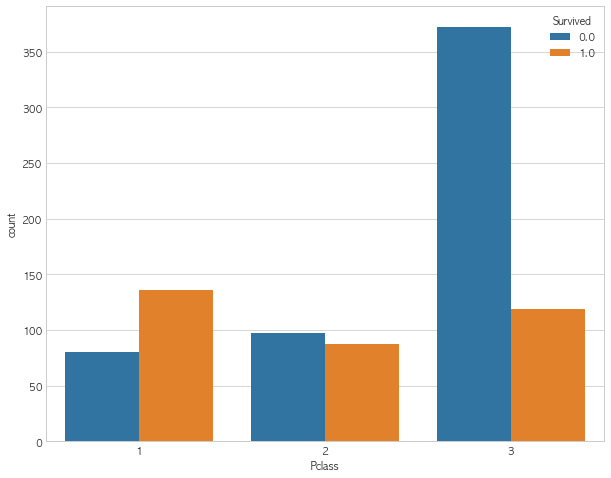

In [9]:
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.show()

1등석은 생존확률이 높고 3등석은 사망확률이 높다.

### Name : 이름

In [10]:
data['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [11]:
# LastName을 추출
data['LastName'] = data.Name.str.extract('([A-Za-z]+)')

In [12]:
# LastName이 얼마나 있는지 확인
data['LastName'].value_counts()

O              12
Andersson      11
Sage           11
Goodwin         8
Asplund         8
               ..
Abbing          1
Banfield        1
Kennedy         1
Francatelli     1
Butt            1
Name: LastName, Length: 853, dtype: int64

### Sex:성별
- male:남성
- female :여성
    

In [13]:
# 결측치확인
data['Sex'].isna().sum()

0

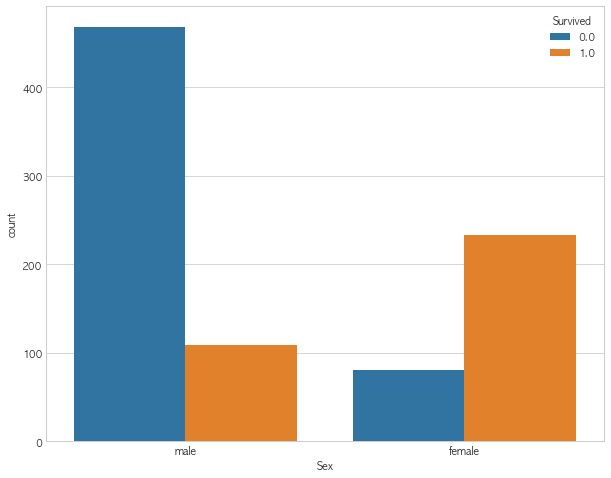

In [14]:
# 데이터 확인
sns.countplot(data=data, x='Sex', hue='Survived')
plt.show()

남성은 사망확률이 높고 여성은 생존확률이 높다.

### Age : 나이

In [15]:
# 결측치 확인
data['Age'].isna().sum()

263

In [16]:
# 이름에서 이니셜을 추출한다.
data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
data['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Major         2
Mlle          2
Dona          1
Mme           1
Sir           1
Countess      1
Jonkheer      1
Don           1
Capt          1
Lady          1
Name: Initial, dtype: int64

In [17]:
# Initial별 나이의 평균
data.groupby('Initial')['Age'].mean()

Initial
Capt        70.000000
Col         54.000000
Countess    33.000000
Don         40.000000
Dona        39.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         36.994118
Ms          28.000000
Rev         41.250000
Sir         49.000000
Name: Age, dtype: float64

In [18]:
data['Age'] = data.groupby('Initial')['Age'].apply(lambda x : x.fillna(x.mean()))
data['Age']

0       22.000000
1       38.000000
2       26.000000
3       35.000000
4       35.000000
          ...    
1304    32.252151
1305    39.000000
1306    38.500000
1307    32.252151
1308     5.482642
Name: Age, Length: 1309, dtype: float64

In [19]:
# 결측치 확인
data['Age'].isna().sum()

0

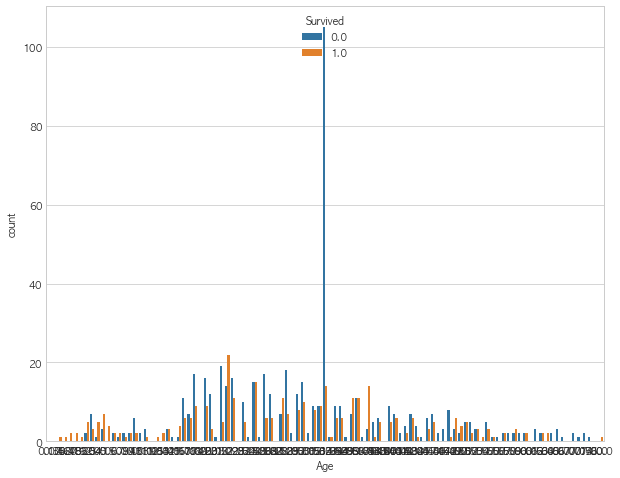

In [20]:
# 나이 결측치를 평균값으로 넣었기 때문에
sns.countplot(data=data, x='Age', hue='Survived')
plt.show()

### SibSp : 동승한 형제, 자매수

In [21]:
# 결측치 확인
data['SibSp'].isna().sum()

0

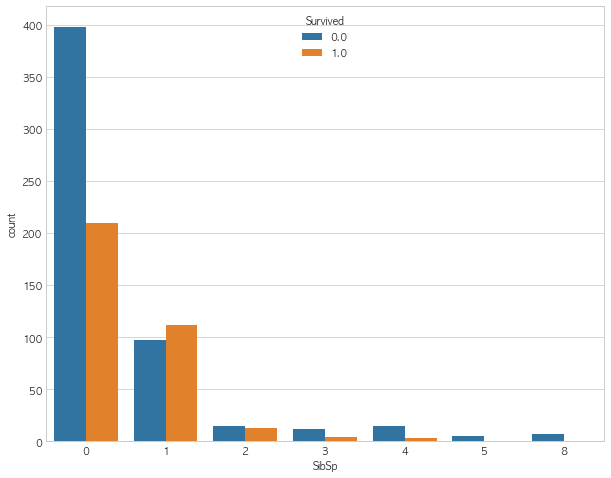

In [22]:
sns.countplot(data=data, x='SibSp', hue='Survived')
plt.show()

### Parch: 동승한 부모자녀수

In [23]:
data['Parch'].isna().sum()

0

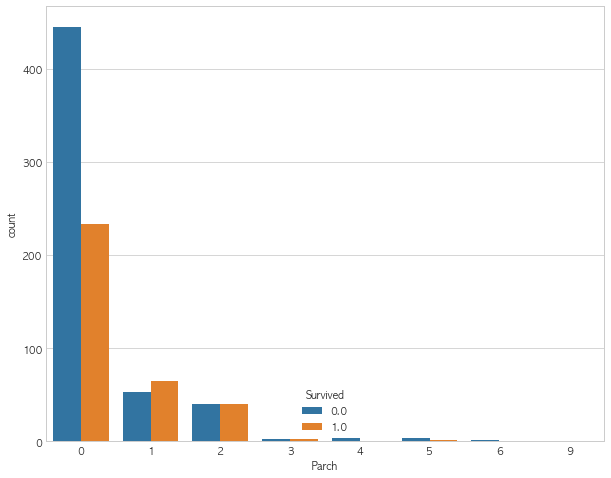

In [24]:
sns.countplot(data=data, x='Parch', hue='Survived')
plt.show()

동승한 부모 자식이 없을경우 사망확률이 올라간다.

### Ticket : 티켓 번호

In [25]:
# 결측치 확인
data['Ticket'].isna().sum()

0

In [26]:
data['Ticket'].value_counts()

CA. 2343    11
1601         8
CA 2144      8
347077       7
347082       7
            ..
PC 17595     1
233734       1
28134        1
392092       1
111240       1
Name: Ticket, Length: 929, dtype: int64

일부 티켓의 경우 동일한 티켓을 가진 사람들이 존재하여 티켓에 따라 사망 생존률이 다르다.

### Fare:요금

In [27]:
data['Fare'].isna().sum()

1

In [28]:
# 요금의 전체 평균을 Fare의 결측치에 넣어준다.
data['Fare']=data['Fare'].fillna(data['Fare'].mean())
data['Fare'].isna().sum()

0

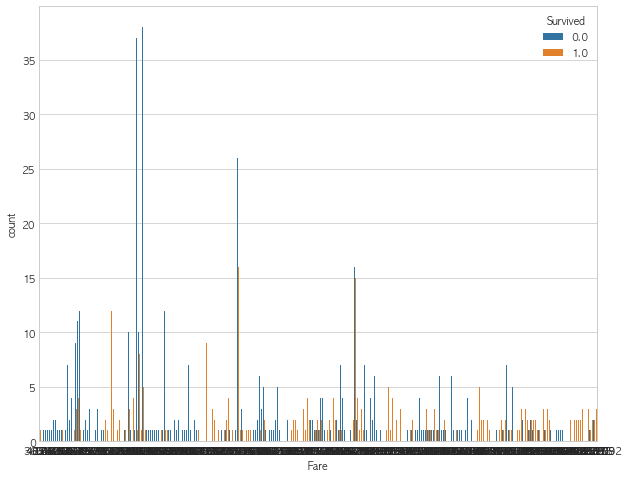

In [29]:
sns.countplot(data=data, x='Fare', hue='Survived')
plt.show()

요금이 낮을수록 사망할 확률이 높다.

### Cabin : 객실

In [30]:
data['Cabin'].isna().sum()

1014

In [31]:
a1 = data['Cabin'].str.extract('^([A-Za-z]+)')
data['Cabin2']= a1
data['Cabin2']

0       NaN
1         C
2       NaN
3         C
4       NaN
       ... 
1304    NaN
1305      C
1306    NaN
1307    NaN
1308    NaN
Name: Cabin2, Length: 1309, dtype: object

In [32]:
# 1등석인 사람들의 객실정보를 확인
b1 = data.query('Pclass == 1')
b2 = b1.loc[b1['Cabin'].notnull()]
b2['Cabin2'].value_counts()

C    94
B    65
D    40
E    34
A    22
T     1
Name: Cabin2, dtype: int64

In [33]:
# 2등석인 사람들의 객실정보를 확인
b1 = data.query('Pclass == 2')
b2 = b1.loc[b1['Cabin'].notnull()]
b2['Cabin2'].value_counts()

F    13
D     6
E     4
Name: Cabin2, dtype: int64

In [34]:
# 3등석인 사람들의 객실정보를 확인
b1 = data.query('Pclass == 3')
b2 = b1.loc[b1['Cabin'].notnull()]
b2['Cabin2'].value_counts()

F    8
G    5
E    3
Name: Cabin2, dtype: int64

In [35]:
# 각 등급마다 겹치는 객실이 있으므로 1등석은 X, 2등석은 Y, 3등석은 Z로 설정

# 객실은 1등급이면서 'Cabin'이 Nan값인거 출력
a1 = data.query('Pclass == 1')
a2 = a1.loc[a1['Cabin'].isnull()]
data.loc[a2.index, 'Cabin2'] = 'X' # 결측치의 인덱스를 가져와 'Cabin2' 컬럼에 'X' 대입
data['Cabin2'].value_counts()

C    94
X    67
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin2, dtype: int64

In [36]:
# 객실은 2등급이면서 'Cabin'이 Nan값인거 출력
a1 = data.query('Pclass == 2')
a2 = a1.loc[a1['Cabin'].isnull()]
data.loc[a2.index, 'Cabin2'] = 'Y' # 결측치의 인덱스를 가져와 'Cabin2' 컬럼에 'X' 대입
data['Cabin2'].value_counts()

Y    254
C     94
X     67
B     65
D     46
E     41
A     22
F     21
G      5
T      1
Name: Cabin2, dtype: int64

In [37]:
# 객실은 3등급이면서 'Cabin'이 Nan값인거 출력
a1 = data.query('Pclass == 3')
a2 = a1.loc[a1['Cabin'].isnull()]
data.loc[a2.index, 'Cabin2'] = 'Z' # 결측치의 인덱스를 가져와 'Cabin2' 컬럼에 'X' 대입
data['Cabin2'].value_counts()

Z    693
Y    254
C     94
X     67
B     65
D     46
E     41
A     22
F     21
G      5
T      1
Name: Cabin2, dtype: int64

In [38]:
data['Cabin2'].isna().sum()

0

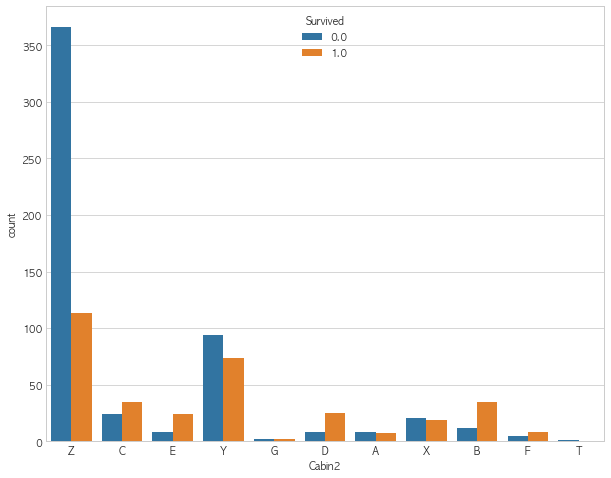

In [39]:
sns.countplot(data=data, x='Cabin2', hue='Survived')
plt.show()

3등석 객실 사람이 사망할 확률이 높다

### Embarked : 선착장

In [40]:
# 결측치 확인
data['Embarked'].isna().sum()

2

In [41]:
a1 = data.loc[data['Embarked'].isnull()]
data.loc[a1.index, 'Embarked'] = 'S'


data['Embarked'].isna().sum()

0

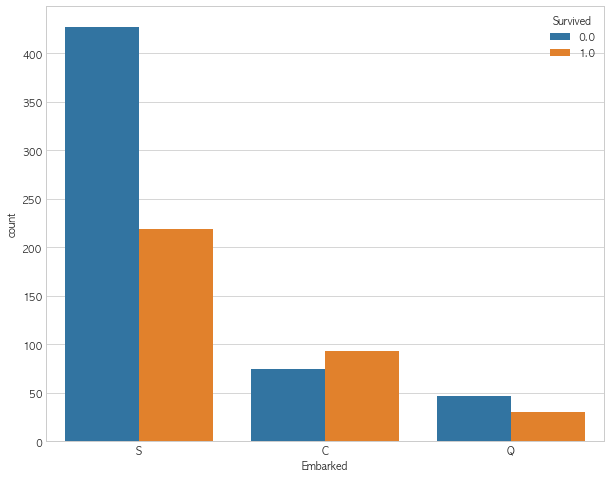

In [42]:
sns.countplot(data=data, x='Embarked', hue='Survived')
plt.show()

S에서 탑승한 승객의 사망확률이 높다.

### 머신러닝

In [43]:
df1 = data.copy()
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Initial,Cabin2
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Z
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Z
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Z
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva,Dona,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Z
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,Ware,Mr,Z


In [44]:
# 불필요한 컬럼 제거
df1 = df1.drop(['PassengerId', 'Survived','Name','Cabin','SibSp','Parch'],axis=1)
df1

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2
0,3,male,22.000000,A/5 21171,7.2500,S,Braund,Mr,Z
1,1,female,38.000000,PC 17599,71.2833,C,Cumings,Mrs,C
2,3,female,26.000000,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Z
3,1,female,35.000000,113803,53.1000,S,Futrelle,Mrs,C
4,3,male,35.000000,373450,8.0500,S,Allen,Mr,Z
...,...,...,...,...,...,...,...,...,...
1304,3,male,32.252151,A.5. 3236,8.0500,S,Spector,Mr,Z
1305,1,female,39.000000,PC 17758,108.9000,C,Oliva,Dona,C
1306,3,male,38.500000,SOTON/O.Q. 3101262,7.2500,S,Saether,Mr,Z
1307,3,male,32.252151,359309,8.0500,S,Ware,Mr,Z


In [45]:
# 가족수를 계산해서 추가해준다.
df1['FamilySize'] = data['SibSp'] + data['Parch'] + 1
df1.head()

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize
0,3,male,22.0,A/5 21171,7.2500,S,Braund,Mr,Z,2
1,1,female,38.0,PC 17599,71.2833,C,Cumings,Mrs,C,2
2,3,female,26.0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Z,1
3,1,female,35.0,113803,53.1000,S,Futrelle,Mrs,C,2
4,3,male,35.0,373450,8.0500,S,Allen,Mr,Z,1


In [46]:
# 문자열을 숫자로 바꾸고 다시 복원할 일이 없다고 할경우 .factorize()
df1['Sex'] = df1['Sex'].factorize()[0]
df1['Ticket'] = df1['Ticket'].factorize()[0]
df1['Cabin2'] = df1['Cabin2'].factorize()[0]
df1['Embarked'] = df1['Embarked'].factorize()[0]
df1['LastName'] = df1['LastName'].factorize()[0]
df1['Initial'] = df1['Initial'].factorize()[0]
df1

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize
0,3,0,22.000000,0,7.2500,0,0,0,0,2
1,1,1,38.000000,1,71.2833,1,1,1,1,2
2,3,1,26.000000,2,7.9250,0,2,2,0,1
3,1,1,35.000000,3,53.1000,0,3,1,1,2
4,3,0,35.000000,4,8.0500,0,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,32.252151,926,8.0500,0,850,0,0,1
1305,1,1,39.000000,273,108.9000,1,851,17,1,1
1306,3,0,38.500000,927,7.2500,0,852,0,0,1
1307,3,0,32.252151,928,8.0500,0,799,0,0,1


In [47]:
# 결측치 확인
df1.isna().sum()

Pclass        0
Sex           0
Age           0
Ticket        0
Fare          0
Embarked      0
LastName      0
Initial       0
Cabin2        0
FamilySize    0
dtype: int64

In [48]:
# 통계량 값을 추가한다. 

# 각 로우의 데이터를 정리한 데이터를 담는 작업
temp = df1.copy()
temp['Survived'] = data['Survived']

In [49]:
# Pclass 생존률
temp.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [50]:
# Sex 생존률 0:남성, 1:여성
temp.groupby('Sex')['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

In [51]:
# Age 생존률 
temp.groupby('Age')['Survived'].mean()

Age
0.17     NaN
0.33     NaN
0.42     1.0
0.67     1.0
0.75     1.0
        ... 
70.50    0.0
71.00    0.0
74.00    0.0
76.00    NaN
80.00    1.0
Name: Survived, Length: 103, dtype: float64

In [52]:
# Ticket 생존률 
temp.groupby('Ticket')['Survived'].mean()

Ticket
0      0.0
1      1.0
2      1.0
3      0.5
4      0.0
      ... 
924    NaN
925    NaN
926    NaN
927    NaN
928    NaN
Name: Survived, Length: 929, dtype: float64

In [53]:
# Fare 생존률 
temp.groupby('Fare')['Survived'].mean()

Fare
0.0000      0.066667
3.1708           NaN
4.0125      0.000000
5.0000      0.000000
6.2375      0.000000
              ...   
227.5250    0.750000
247.5208    0.500000
262.3750    1.000000
263.0000    0.500000
512.3292    1.000000
Name: Survived, Length: 282, dtype: float64

In [54]:
# 생존율 데이터로 변환
temp['Pclass'] = temp.groupby('Pclass')['Survived'].transform('mean')
temp['Sex'] = temp.groupby('Sex')['Survived'].transform('mean')
temp['Age'] = temp.groupby('Age')['Survived'].transform('mean')
temp['Ticket'] = temp.groupby('Ticket')['Survived'].transform('mean')
temp['Fare'] = temp.groupby('Fare')['Survived'].transform('mean')
temp['Embarked'] = temp.groupby('Embarked')['Survived'].transform('mean')
temp['LastName'] = temp.groupby('LastName')['Survived'].transform('mean')
temp['Initial'] = temp.groupby('Initial')['Survived'].transform('mean')
temp['Cabin2'] = temp.groupby('Cabin2')['Survived'].transform('mean')
temp['FamilySize'] = temp.groupby('FamilySize')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0.188908,0.407407,0.0,0.076923,0.339009,0.0,0.156673,0.235908,0.552795,0.0
1,0.629630,0.742038,0.454545,1.0,1.000000,0.553571,1.0,0.792000,0.593220,0.552795,1.0
2,0.242363,0.742038,0.333333,1.0,0.444444,0.339009,1.0,0.697802,0.235908,0.303538,1.0
3,0.629630,0.742038,0.611111,0.5,0.600000,0.339009,0.5,0.792000,0.593220,0.552795,1.0
4,0.242363,0.188908,0.611111,0.0,0.116279,0.339009,0.5,0.156673,0.235908,0.303538,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0.235908,0.303538,NaN
1305,0.629630,0.742038,0.357143,0.5,0.500000,0.553571,NaN,NaN,0.593220,0.303538,NaN
1306,0.242363,0.188908,NaN,NaN,0.076923,0.339009,NaN,0.156673,0.235908,0.303538,NaN
1307,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0.235908,0.303538,NaN


In [55]:
# 각 로우별 통계량을 구해서 담아준다.
temp['Mean'] = 0    # 평균
temp['Max'] = 0     # 최대
temp['Min'] = 0     # 최소
temp['Social'] = 0  # 개인정보
temp['Wealth'] = 0  # 탑승정보
temp['Diff'] = 0    # 최대 - 최소

In [56]:
temp['Mean'] = temp.mean(axis=1)
temp['Max'] = temp.max(axis=1)
temp['Min'] = temp.min(axis=1)
temp['Social'] = (temp['Initial'] + temp['Sex'] + temp['Age'] + temp['FamilySize']) / 4
temp['Wealth'] = (temp['Pclass'] + temp['Ticket'] + temp['Fare'] + temp['Cabin2']) / 4
temp['Diff'] = temp['Max'] - temp['Min']
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived,Mean,Max,Min,Social,Wealth,Diff
0,0.242363,0.188908,0.407407,0.0,0.076923,0.339009,0.0,0.156673,0.235908,0.552795,0.0,0.129411,0.552795,0.0,0.326446,0.138798,0.552795
1,0.629630,0.742038,0.454545,1.0,1.000000,0.553571,1.0,0.792000,0.593220,0.552795,1.0,0.489282,1.000000,0.0,0.635345,0.805712,1.000000
2,0.242363,0.742038,0.333333,1.0,0.444444,0.339009,1.0,0.697802,0.235908,0.303538,1.0,0.372849,1.000000,0.0,0.519178,0.480679,1.000000
3,0.629630,0.742038,0.611111,0.5,0.600000,0.339009,0.5,0.792000,0.593220,0.552795,1.0,0.403518,1.000000,0.0,0.674486,0.580712,1.000000
4,0.242363,0.188908,0.611111,0.0,0.116279,0.339009,0.5,0.156673,0.235908,0.303538,0.0,0.158458,0.611111,0.0,0.315058,0.148637,0.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0.235908,0.303538,NaN,0.121452,0.339009,0.0,0.191692,NaN,0.339009
1305,0.629630,0.742038,0.357143,0.5,0.500000,0.553571,NaN,NaN,0.593220,0.303538,NaN,0.298510,0.742038,0.0,NaN,0.555712,0.742038
1306,0.242363,0.188908,NaN,NaN,0.076923,0.339009,NaN,0.156673,0.235908,0.303538,NaN,0.118717,0.339009,0.0,NaN,NaN,0.339009
1307,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0.235908,0.303538,NaN,0.121452,0.339009,0.0,0.191692,NaN,0.339009


In [57]:
# 통계 데이터를 원본에 담는다.
df1['Mean'] = temp['Mean']
df1['Max'] = temp['Max']
df1['Min'] = temp['Min']
df1['Social'] = temp['Social']
df1['Wealth'] = temp['Wealth']
df1['Diff'] = temp['Diff']
df1

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Mean,Max,Min,Social,Wealth,Diff
0,3,0,22.000000,0,7.2500,0,0,0,0,2,0.129411,0.552795,0.0,0.326446,0.138798,0.552795
1,1,1,38.000000,1,71.2833,1,1,1,1,2,0.489282,1.000000,0.0,0.635345,0.805712,1.000000
2,3,1,26.000000,2,7.9250,0,2,2,0,1,0.372849,1.000000,0.0,0.519178,0.480679,1.000000
3,1,1,35.000000,3,53.1000,0,3,1,1,2,0.403518,1.000000,0.0,0.674486,0.580712,1.000000
4,3,0,35.000000,4,8.0500,0,4,0,0,1,0.158458,0.611111,0.0,0.315058,0.148637,0.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,32.252151,926,8.0500,0,850,0,0,1,0.121452,0.339009,0.0,0.191692,NaN,0.339009
1305,1,1,39.000000,273,108.9000,1,851,17,1,1,0.298510,0.742038,0.0,NaN,0.555712,0.742038
1306,3,0,38.500000,927,7.2500,0,852,0,0,1,0.118717,0.339009,0.0,NaN,NaN,0.339009
1307,3,0,32.252151,928,8.0500,0,799,0,0,1,0.121452,0.339009,0.0,0.191692,NaN,0.339009


In [58]:
# 데이터를 준비한다.
# train 데이터의 개수
n_train = train_df.shape[0]

# test 데이터의 개수
n_test = test_df.shape[0]

# 결과 데이터
y_train=train_df['Survived'].values

# test 데이터의 승객 번호를 가져온다.
passid = test_df['PassengerId']

In [59]:
# 데이터프레임의 데이터를 한번 정리해준다.
# 각 컬럼의 값을 작은 숫자부터 큰 숫자까지 0부터 시작하는 값으로 바꾼다.
df1_enc = df1.apply(LabelEncoder().fit_transform)
df1_enc

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Mean,Max,Min,Social,Wealth,Diff
0,2,0,34,0,20,0,0,0,0,1,159,15,0,83,2,15
1,0,1,61,1,238,1,1,1,1,1,1098,34,0,266,142,34
2,2,1,41,2,50,0,2,2,0,0,838,34,0,164,78,34
3,0,1,56,3,218,0,3,1,1,1,910,34,0,285,96,34
4,2,0,56,4,52,0,4,0,0,0,325,19,0,74,3,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,2,0,51,926,52,0,850,0,0,0,111,0,0,7,218,0
1305,0,1,63,273,262,1,851,17,1,0,703,26,0,322,90,26
1306,2,0,62,927,20,0,852,0,0,0,102,0,0,323,181,0
1307,2,0,51,928,52,0,799,0,0,0,111,0,0,7,392,0


In [60]:
# 학습용 데이터와 예측용 데이터로 나누다.
X_train = df1_enc[:n_train]
X_test = df1_enc[n_train:]

print(len(X_train),len(X_test))

891 418


In [61]:
# 스케일링 작업
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 기본 모델로 테스트

In [62]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gbc = GaussianProcessClassifier()
bag = BaggingClassifier()

In [63]:
# 사용할 알고리즘 객체들을 리스트에 담는다.
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gbc, bag]

# 각 모델별 성능을 담을 리스트
scores = []

In [64]:
# 성능 테스트
for m1 in models:
    # 학습
    m1.fit(X_train, y_train)
    # 교차검증
    acc = cross_val_score(m1, X_train, y_train, scoring='accuracy',cv=10)
    # 교차검증에 대한 평균 성능 수치를 리스트에 담는다.
    scores.append(acc.mean())

In [65]:
# 성능 결과를 보기위해 데이터 프레임 생성
results = pd.DataFrame({
    'Model' : ['Random Forest', 'KNN', 'Logistic Regression',
               'XGBoost', 'Gradian Boosting', 'SVC', 'Extra Trees',
               'AdaBoost','Gaussian Naive Bayes','Gaussian Process',
               'Bagging Classifier'],
    'Score' : scores
})

result_df = results.sort_values(by='Score', ascending=False).reset_index(drop=True)
result_df

,Model,Score
0,XGBoost,1.000000
1,AdaBoost,1.000000
2,Gaussian Naive Bayes,1.000000
3,Bagging Classifier,1.000000
4,Logistic Regression,0.998876
5,Extra Trees,0.998876
6,Random Forest,0.997753
7,SVC,0.992135
8,Gradian Boosting,0.986542
9,Gaussian Process,0.986542


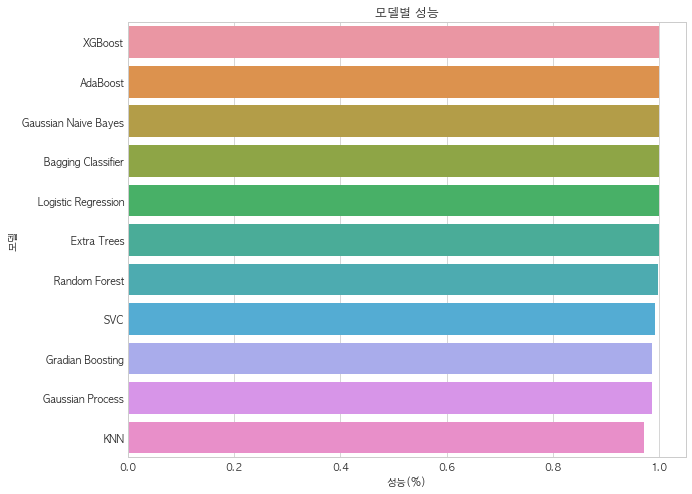

In [66]:
sns.barplot(data=result_df, x='Score', y='Model')
plt.title('모델별 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.show()

통계 데이터를 삽입했을경우 정확도가 0.15정도 올라간것을 확인

### 각 모델별 핵심 컬럼이 무엇인지 확인해본다.

In [76]:
svc_imp = pd.DataFrame(
    {
    'column' : df1.columns,
    'importance' : svc.feature_importances_
    }
)
svc_imp

AttributeError: 'SVC' object has no attribute 'feature_importances_'

### 미리 확인한 하이퍼 파라미터를 설정

In [77]:
ran = RandomForestClassifier(n_estimators=25,
                            max_depth=3,
                            max_features=3,
                            min_samples_leaf=2,
                            min_impurity_split=8,
                            random_state=1)

In [78]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=1,
                          n_neighbors=5, weights='uniform')

In [79]:
xgb = XGBClassifier(learning_rate=0.0001, n_estimators=10, random_state=1)

In [80]:
gbc = GradientBoostingClassifier(learning_rate=0.0005, n_estimators=1250,
                                random_state=1)

In [81]:
svc = SVC(probability=True)

In [82]:
ext = ExtraTreesClassifier(max_depth=None, max_features=3,
                          min_samples_leaf=2, min_samples_split=8,
                          n_estimators=10, random_state=1)

In [83]:
ada = AdaBoostClassifier(learning_rate=0.1, n_estimators=50, random_state=1)

In [84]:
gpc = GaussianProcessClassifier()

In [85]:
bag = BaggingClassifier(random_state=1)

In [87]:
# 사용할 알고리즘 객체들을 리스트에 담는다.
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gpc, bag]
# 각 모델별 성능을 담을 리스트
scores = []

# 성능 테스트
for m1 in models : 
    # 학습
    m1.fit(X_train, y_train)
    # 교차검증
    acc = cross_val_score(m1, X_train, y_train, scoring='accuracy', cv=10)
    # 교차검증에 대한 평균 성능 수치를 리스트에 담는다.
    scores.append(acc.mean())

# 성능 결과를 보기위해 데이터 프레임을 생성한다.
results = pd.DataFrame({
    'Model' : ['Random Forest', 'KNN', 'Logistic Regression',
               'XGBoost', 'Gradian Boosting', 'SVC', 'Extra Trees',
               'AdaBoost', 'Gausian Process',
               'Bagging Classifier'],
    'Score' : scores
})
result_df = results.sort_values(by='Score', ascending=False).reset_index(drop=True)
result_df

,Model,Score
0,XGBoost,1.000000
1,Gradian Boosting,1.000000
2,AdaBoost,1.000000
3,Bagging Classifier,1.000000
4,Logistic Regression,0.998876
5,Extra Trees,0.996629
6,SVC,0.992135
7,Gausian Process,0.986542
8,KNN,0.970824
9,Random Forest,0.616167


### Voting
- 다수의 알고리즘이 던지는 결과를 취합하여 결과를 예측한다.
- soft voting : 각 알고리즘이 던지는 예측 결과 확률을 취합해서 확률이 높은걸 선택
- hard voting : 각 알고리즘이 던지는 예측 결과 값을 취합해서 가장 많이 나온 것을 선택

In [90]:
# 하드보팅
a1 = [
    ('model1', ran), ('model2', knn), ('model3', log), ('model4', xgb), 
    ('model5', gbc), ('model6', svc), ('model7', ext), ('model8', ada),
    ('model9', gpc), ('model10', bag)
]
voting1 = VotingClassifier(estimators=a1, voting='hard')

result = cross_val_score(voting1, X_train, y_train, cv=10)
result.mean()

1.0

In [89]:
# 소프트보팅
a1 = [
    ('model1', ran), ('model2', knn), ('model3', log), ('model4', xgb), 
    ('model5', gbc), ('model6', svc), ('model7', ext), ('model8', ada),
    ('model9', gpc), ('model10', bag)
]
voting2 = VotingClassifier(estimators=a1, voting='soft')

result = cross_val_score(voting2, X_train, y_train, cv=10)
result.mean()

1.0

### Deep Learning

In [97]:
# seed 설정
np.random.seed(3)
tf.random.set_seed(3)

In [98]:
# 모델 설정
model = Sequential()
model.add(Dense(30,input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [99]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [100]:
# 모델 저장 조건
model_path = 'models/Titanic/{epoch}-{val_loss}.hdf5'
callback1 = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)

In [101]:
# 자동 중단 설정
callback2 = EarlyStopping(monitor='val_loss', patience=200)

In [103]:
# 모델 실행
model.fit(X_train, y_train, validation_split=0.2, epochs=100000, batch_size=500, callbacks=[callback1, callback2])

Epoch 1/100000
2/2 [==============================] - 0s 157ms/step - loss: 0.6048 - accuracy: 0.7331 - val_loss: 0.5945 - val_accuracy: 0.6872

Epoch 00001: val_loss improved from inf to 0.59448, saving model to models/Titanic/1-0.5944772362709045.hdf5
Epoch 2/100000
2/2 [==============================] - 0s 54ms/step - loss: 0.5851 - accuracy: 0.7753 - val_loss: 0.5688 - val_accuracy: 0.7151

Epoch 00002: val_loss improved from 0.59448 to 0.56878, saving model to models/Titanic/2-0.5687782168388367.hdf5
Epoch 3/100000
2/2 [==============================] - 0s 56ms/step - loss: 0.5665 - accuracy: 0.7907 - val_loss: 0.5454 - val_accuracy: 0.7598

Epoch 00003: val_loss improved from 0.56878 to 0.54539, saving model to models/Titanic/3-0.5453944206237793.hdf5
Epoch 4/100000
2/2 [==============================] - 0s 54ms/step - loss: 0.5488 - accuracy: 0.8076 - val_loss: 0.5239 - val_accuracy: 0.7877

Epoch 00004: val_loss improved from 0.54539 to 0.52393, saving model to models/Titanic/4


Epoch 00032: val_loss improved from 0.25667 to 0.25164, saving model to models/Titanic/32-0.2516443431377411.hdf5
Epoch 33/100000
2/2 [==============================] - 0s 55ms/step - loss: 0.2793 - accuracy: 0.9326 - val_loss: 0.2468 - val_accuracy: 0.9330

Epoch 00033: val_loss improved from 0.25164 to 0.24678, saving model to models/Titanic/33-0.2467810958623886.hdf5
Epoch 34/100000
2/2 [==============================] - 0s 48ms/step - loss: 0.2741 - accuracy: 0.9340 - val_loss: 0.2421 - val_accuracy: 0.9330

Epoch 00034: val_loss improved from 0.24678 to 0.24209, saving model to models/Titanic/34-0.24208985269069672.hdf5
Epoch 35/100000
2/2 [==============================] - 0s 48ms/step - loss: 0.2692 - accuracy: 0.9368 - val_loss: 0.2375 - val_accuracy: 0.9385

Epoch 00035: val_loss improved from 0.24209 to 0.23754, saving model to models/Titanic/35-0.23753778636455536.hdf5
Epoch 36/100000
2/2 [==============================] - 0s 49ms/step - loss: 0.2643 - accuracy: 0.9396 - va

2/2 [==============================] - 0s 45ms/step - loss: 0.1656 - accuracy: 0.9705 - val_loss: 0.1505 - val_accuracy: 0.9832

Epoch 00064: val_loss improved from 0.15247 to 0.15049, saving model to models/Titanic/64-0.1504858285188675.hdf5
Epoch 65/100000
2/2 [==============================] - 0s 50ms/step - loss: 0.1630 - accuracy: 0.9719 - val_loss: 0.1485 - val_accuracy: 0.9832

Epoch 00065: val_loss improved from 0.15049 to 0.14854, saving model to models/Titanic/65-0.14854145050048828.hdf5
Epoch 66/100000
2/2 [==============================] - 0s 46ms/step - loss: 0.1604 - accuracy: 0.9719 - val_loss: 0.1467 - val_accuracy: 0.9832

Epoch 00066: val_loss improved from 0.14854 to 0.14666, saving model to models/Titanic/66-0.14665617048740387.hdf5
Epoch 67/100000
2/2 [==============================] - 0s 47ms/step - loss: 0.1579 - accuracy: 0.9719 - val_loss: 0.1448 - val_accuracy: 0.9832

Epoch 00067: val_loss improved from 0.14666 to 0.14480, saving model to models/Titanic/67-0.

2/2 [==============================] - 0s 49ms/step - loss: 0.1023 - accuracy: 0.9874 - val_loss: 0.1048 - val_accuracy: 0.9777

Epoch 00096: val_loss improved from 0.10586 to 0.10481, saving model to models/Titanic/96-0.10480504482984543.hdf5
Epoch 97/100000
2/2 [==============================] - 0s 53ms/step - loss: 0.1008 - accuracy: 0.9874 - val_loss: 0.1038 - val_accuracy: 0.9777

Epoch 00097: val_loss improved from 0.10481 to 0.10376, saving model to models/Titanic/97-0.10376368463039398.hdf5
Epoch 98/100000
2/2 [==============================] - 0s 48ms/step - loss: 0.0994 - accuracy: 0.9874 - val_loss: 0.1028 - val_accuracy: 0.9777

Epoch 00098: val_loss improved from 0.10376 to 0.10276, saving model to models/Titanic/98-0.1027587503194809.hdf5
Epoch 99/100000
2/2 [==============================] - 0s 48ms/step - loss: 0.0981 - accuracy: 0.9874 - val_loss: 0.1018 - val_accuracy: 0.9777

Epoch 00099: val_loss improved from 0.10276 to 0.10179, saving model to models/Titanic/99-0.


Epoch 00127: val_loss improved from 0.08145 to 0.08085, saving model to models/Titanic/127-0.08085180073976517.hdf5
Epoch 128/100000
2/2 [==============================] - 0s 51ms/step - loss: 0.0679 - accuracy: 0.9930 - val_loss: 0.0803 - val_accuracy: 0.9777

Epoch 00128: val_loss improved from 0.08085 to 0.08028, saving model to models/Titanic/128-0.08028307557106018.hdf5
Epoch 129/100000
2/2 [==============================] - 0s 55ms/step - loss: 0.0671 - accuracy: 0.9930 - val_loss: 0.0797 - val_accuracy: 0.9777

Epoch 00129: val_loss improved from 0.08028 to 0.07974, saving model to models/Titanic/129-0.07973840087652206.hdf5
Epoch 130/100000
2/2 [==============================] - 0s 50ms/step - loss: 0.0664 - accuracy: 0.9930 - val_loss: 0.0792 - val_accuracy: 0.9777

Epoch 00130: val_loss improved from 0.07974 to 0.07919, saving model to models/Titanic/130-0.07918597757816315.hdf5
Epoch 131/100000
2/2 [==============================] - 0s 48ms/step - loss: 0.0656 - accuracy: 0

2/2 [==============================] - 0s 49ms/step - loss: 0.0492 - accuracy: 0.9930 - val_loss: 0.0658 - val_accuracy: 0.9777

Epoch 00159: val_loss improved from 0.06619 to 0.06582, saving model to models/Titanic/159-0.06581518799066544.hdf5
Epoch 160/100000
2/2 [==============================] - 0s 48ms/step - loss: 0.0487 - accuracy: 0.9930 - val_loss: 0.0654 - val_accuracy: 0.9777

Epoch 00160: val_loss improved from 0.06582 to 0.06543, saving model to models/Titanic/160-0.06542976200580597.hdf5
Epoch 161/100000
2/2 [==============================] - 0s 51ms/step - loss: 0.0483 - accuracy: 0.9930 - val_loss: 0.0650 - val_accuracy: 0.9777

Epoch 00161: val_loss improved from 0.06543 to 0.06505, saving model to models/Titanic/161-0.0650494247674942.hdf5
Epoch 162/100000
2/2 [==============================] - 0s 50ms/step - loss: 0.0478 - accuracy: 0.9930 - val_loss: 0.0647 - val_accuracy: 0.9777

Epoch 00162: val_loss improved from 0.06505 to 0.06466, saving model to models/Titanic

2/2 [==============================] - 0s 47ms/step - loss: 0.0375 - accuracy: 0.9972 - val_loss: 0.0562 - val_accuracy: 0.9777

Epoch 00190: val_loss improved from 0.05640 to 0.05617, saving model to models/Titanic/190-0.05616825073957443.hdf5
Epoch 191/100000
2/2 [==============================] - 0s 49ms/step - loss: 0.0372 - accuracy: 0.9972 - val_loss: 0.0559 - val_accuracy: 0.9777

Epoch 00191: val_loss improved from 0.05617 to 0.05593, saving model to models/Titanic/191-0.05592852458357811.hdf5
Epoch 192/100000
2/2 [==============================] - 0s 49ms/step - loss: 0.0369 - accuracy: 0.9972 - val_loss: 0.0557 - val_accuracy: 0.9777

Epoch 00192: val_loss improved from 0.05593 to 0.05571, saving model to models/Titanic/192-0.0557088740170002.hdf5
Epoch 193/100000
2/2 [==============================] - 0s 54ms/step - loss: 0.0366 - accuracy: 0.9972 - val_loss: 0.0555 - val_accuracy: 0.9777

Epoch 00193: val_loss improved from 0.05571 to 0.05548, saving model to models/Titanic

2/2 [==============================] - 0s 60ms/step - loss: 0.0294 - accuracy: 0.9986 - val_loss: 0.0491 - val_accuracy: 0.9888

Epoch 00221: val_loss improved from 0.04931 to 0.04915, saving model to models/Titanic/221-0.049147602170705795.hdf5
Epoch 222/100000
2/2 [==============================] - 0s 64ms/step - loss: 0.0292 - accuracy: 0.9986 - val_loss: 0.0490 - val_accuracy: 0.9888

Epoch 00222: val_loss improved from 0.04915 to 0.04896, saving model to models/Titanic/222-0.048963431268930435.hdf5
Epoch 223/100000
2/2 [==============================] - 0s 67ms/step - loss: 0.0290 - accuracy: 0.9986 - val_loss: 0.0488 - val_accuracy: 0.9888

Epoch 00223: val_loss improved from 0.04896 to 0.04877, saving model to models/Titanic/223-0.048767395317554474.hdf5
Epoch 224/100000
2/2 [==============================] - 0s 62ms/step - loss: 0.0288 - accuracy: 0.9986 - val_loss: 0.0486 - val_accuracy: 0.9888

Epoch 00224: val_loss improved from 0.04877 to 0.04860, saving model to models/Tit

2/2 [==============================] - 0s 50ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.0445 - val_accuracy: 0.9888

Epoch 00252: val_loss improved from 0.04471 to 0.04454, saving model to models/Titanic/252-0.044544871896505356.hdf5
Epoch 253/100000
2/2 [==============================] - 0s 49ms/step - loss: 0.0237 - accuracy: 1.0000 - val_loss: 0.0444 - val_accuracy: 0.9888

Epoch 00253: val_loss improved from 0.04454 to 0.04436, saving model to models/Titanic/253-0.04436173662543297.hdf5
Epoch 254/100000
2/2 [==============================] - 0s 53ms/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9888

Epoch 00254: val_loss improved from 0.04436 to 0.04419, saving model to models/Titanic/254-0.044185295701026917.hdf5
Epoch 255/100000
2/2 [==============================] - 0s 51ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 0.0440 - val_accuracy: 0.9888

Epoch 00255: val_loss improved from 0.04419 to 0.04400, saving model to models/Tita

2/2 [==============================] - 0s 51ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 0.0406 - val_accuracy: 0.9888

Epoch 00283: val_loss improved from 0.04076 to 0.04062, saving model to models/Titanic/283-0.0406225211918354.hdf5
Epoch 284/100000
2/2 [==============================] - 0s 52ms/step - loss: 0.0198 - accuracy: 1.0000 - val_loss: 0.0405 - val_accuracy: 0.9888

Epoch 00284: val_loss improved from 0.04062 to 0.04049, saving model to models/Titanic/284-0.04049185663461685.hdf5
Epoch 285/100000
2/2 [==============================] - 0s 50ms/step - loss: 0.0197 - accuracy: 1.0000 - val_loss: 0.0404 - val_accuracy: 0.9888

Epoch 00285: val_loss improved from 0.04049 to 0.04038, saving model to models/Titanic/285-0.040380749851465225.hdf5
Epoch 286/100000
2/2 [==============================] - 0s 51ms/step - loss: 0.0196 - accuracy: 1.0000 - val_loss: 0.0403 - val_accuracy: 0.9888

Epoch 00286: val_loss improved from 0.04038 to 0.04027, saving model to models/Titani

2/2 [==============================] - 0s 54ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.0379 - val_accuracy: 0.9888

Epoch 00314: val_loss improved from 0.03808 to 0.03793, saving model to models/Titanic/314-0.037932805716991425.hdf5
Epoch 315/100000
2/2 [==============================] - 0s 46ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.0378 - val_accuracy: 0.9888

Epoch 00315: val_loss improved from 0.03793 to 0.03779, saving model to models/Titanic/315-0.03778834640979767.hdf5
Epoch 316/100000
2/2 [==============================] - 0s 47ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.0376 - val_accuracy: 0.9888

Epoch 00316: val_loss improved from 0.03779 to 0.03764, saving model to models/Titanic/316-0.037643566727638245.hdf5
Epoch 317/100000
2/2 [==============================] - 0s 54ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.0375 - val_accuracy: 0.9888

Epoch 00317: val_loss improved from 0.03764 to 0.03747, saving model to models/Tita

2/2 [==============================] - 0s 71ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.0354 - val_accuracy: 0.9888

Epoch 00345: val_loss improved from 0.03542 to 0.03538, saving model to models/Titanic/345-0.03537673130631447.hdf5
Epoch 346/100000
2/2 [==============================] - 0s 53ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 0.9888

Epoch 00346: val_loss improved from 0.03538 to 0.03533, saving model to models/Titanic/346-0.035326387733221054.hdf5
Epoch 347/100000
2/2 [==============================] - 0s 48ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 0.9888

Epoch 00347: val_loss improved from 0.03533 to 0.03529, saving model to models/Titanic/347-0.03528802841901779.hdf5
Epoch 348/100000
2/2 [==============================] - 0s 49ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 0.9888

Epoch 00348: val_loss improved from 0.03529 to 0.03525, saving model to models/Titan

2/2 [==============================] - 0s 51ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.0333 - val_accuracy: 0.9888

Epoch 00376: val_loss improved from 0.03339 to 0.03328, saving model to models/Titanic/376-0.03327696770429611.hdf5
Epoch 377/100000
2/2 [==============================] - 0s 61ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.0332 - val_accuracy: 0.9888

Epoch 00377: val_loss improved from 0.03328 to 0.03320, saving model to models/Titanic/377-0.0331978015601635.hdf5
Epoch 378/100000
2/2 [==============================] - 0s 56ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.0332 - val_accuracy: 0.9888

Epoch 00378: val_loss improved from 0.03320 to 0.03316, saving model to models/Titanic/378-0.03315598890185356.hdf5
Epoch 379/100000
2/2 [==============================] - 0s 54ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.0331 - val_accuracy: 0.9888

Epoch 00379: val_loss improved from 0.03316 to 0.03313, saving model to models/Titanic


Epoch 00408: val_loss did not improve from 0.03258
Epoch 409/100000
2/2 [==============================] - 0s 54ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 0.9888

Epoch 00409: val_loss did not improve from 0.03258
Epoch 410/100000
2/2 [==============================] - 0s 47ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 0.9888

Epoch 00410: val_loss did not improve from 0.03258
Epoch 411/100000
2/2 [==============================] - 0s 48ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 0.9888

Epoch 00411: val_loss did not improve from 0.03258
Epoch 412/100000
2/2 [==============================] - 0s 47ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 0.9888

Epoch 00412: val_loss did not improve from 0.03258
Epoch 413/100000
2/2 [==============================] - 0s 48ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0327 - val_accuracy: 0.9888

Epoch 00413: v

2/2 [==============================] - 0s 49ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0313 - val_accuracy: 0.9888

Epoch 00442: val_loss improved from 0.03132 to 0.03130, saving model to models/Titanic/442-0.0313015952706337.hdf5
Epoch 443/100000
2/2 [==============================] - 0s 49ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0313 - val_accuracy: 0.9888

Epoch 00443: val_loss improved from 0.03130 to 0.03128, saving model to models/Titanic/443-0.031280964612960815.hdf5
Epoch 444/100000
2/2 [==============================] - 0s 46ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0313 - val_accuracy: 0.9888

Epoch 00444: val_loss improved from 0.03128 to 0.03126, saving model to models/Titanic/444-0.031256772577762604.hdf5
Epoch 445/100000
2/2 [==============================] - 0s 47ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0312 - val_accuracy: 0.9888

Epoch 00445: val_loss improved from 0.03126 to 0.03122, saving model to models/Titan


Epoch 00476: val_loss improved from 0.03066 to 0.03063, saving model to models/Titanic/476-0.0306306891143322.hdf5
Epoch 477/100000
2/2 [==============================] - 0s 53ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 0.9888

Epoch 00477: val_loss improved from 0.03063 to 0.03062, saving model to models/Titanic/477-0.03062053583562374.hdf5
Epoch 478/100000
2/2 [==============================] - 0s 51ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 0.9888

Epoch 00478: val_loss improved from 0.03062 to 0.03060, saving model to models/Titanic/478-0.03059663437306881.hdf5
Epoch 479/100000
2/2 [==============================] - 0s 51ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 0.9888

Epoch 00479: val_loss improved from 0.03060 to 0.03056, saving model to models/Titanic/479-0.030560405924916267.hdf5
Epoch 480/100000
2/2 [==============================] - 0s 50ms/step - loss: 0.0086 - accuracy: 1


Epoch 00513: val_loss improved from 0.03037 to 0.03032, saving model to models/Titanic/513-0.030321020632982254.hdf5
Epoch 514/100000
2/2 [==============================] - 0s 51ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0303 - val_accuracy: 0.9888

Epoch 00514: val_loss improved from 0.03032 to 0.03028, saving model to models/Titanic/514-0.030283629894256592.hdf5
Epoch 515/100000
2/2 [==============================] - 0s 43ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0303 - val_accuracy: 0.9888

Epoch 00515: val_loss improved from 0.03028 to 0.03025, saving model to models/Titanic/515-0.03025282360613346.hdf5
Epoch 516/100000
2/2 [==============================] - 0s 45ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0302 - val_accuracy: 0.9888

Epoch 00516: val_loss improved from 0.03025 to 0.03021, saving model to models/Titanic/516-0.030208025127649307.hdf5
Epoch 517/100000
2/2 [==============================] - 0s 44ms/step - loss: 0.0075 - accuracy


Epoch 00548: val_loss did not improve from 0.02917
Epoch 549/100000
2/2 [==============================] - 0s 47ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0293 - val_accuracy: 0.9888

Epoch 00549: val_loss did not improve from 0.02917
Epoch 550/100000
2/2 [==============================] - 0s 44ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0292 - val_accuracy: 0.9888

Epoch 00550: val_loss did not improve from 0.02917
Epoch 551/100000
2/2 [==============================] - 0s 44ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0292 - val_accuracy: 0.9888

Epoch 00551: val_loss did not improve from 0.02917
Epoch 552/100000
2/2 [==============================] - 0s 45ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0292 - val_accuracy: 0.9888

Epoch 00552: val_loss did not improve from 0.02917
Epoch 553/100000
2/2 [==============================] - 0s 44ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0292 - val_accuracy: 0.9888

Epoch 00553: v

2/2 [==============================] - 0s 53ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 0.9888

Epoch 00587: val_loss did not improve from 0.02885
Epoch 588/100000
2/2 [==============================] - 0s 48ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 0.9888

Epoch 00588: val_loss did not improve from 0.02885
Epoch 589/100000
2/2 [==============================] - 0s 49ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 0.9888

Epoch 00589: val_loss did not improve from 0.02885
Epoch 590/100000
2/2 [==============================] - 0s 46ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 0.9888

Epoch 00590: val_loss did not improve from 0.02885
Epoch 591/100000
2/2 [==============================] - 0s 47ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 0.9888

Epoch 00591: val_loss did not improve from 0.02885
Epoch 592/100000
2/2 [==========

2/2 [==============================] - 0s 50ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 0.9888

Epoch 00627: val_loss did not improve from 0.02877
Epoch 628/100000
2/2 [==============================] - 0s 58ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 0.9888

Epoch 00628: val_loss did not improve from 0.02877
Epoch 629/100000
2/2 [==============================] - 0s 50ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 0.9888

Epoch 00629: val_loss did not improve from 0.02877
Epoch 630/100000
2/2 [==============================] - 0s 54ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 0.9888

Epoch 00630: val_loss did not improve from 0.02877
Epoch 631/100000
2/2 [==============================] - 0s 51ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 0.9888

Epoch 00631: val_loss did not improve from 0.02877
Epoch 632/100000
2/2 [==========

2/2 [==============================] - 0s 49ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9888

Epoch 00668: val_loss did not improve from 0.02873
Epoch 669/100000
2/2 [==============================] - 0s 57ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9888

Epoch 00669: val_loss did not improve from 0.02873
Epoch 670/100000
2/2 [==============================] - 0s 49ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9888

Epoch 00670: val_loss did not improve from 0.02873
Epoch 671/100000
2/2 [==============================] - 0s 54ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9888

Epoch 00671: val_loss did not improve from 0.02873
Epoch 672/100000
2/2 [==============================] - 0s 53ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9888

Epoch 00672: val_loss did not improve from 0.02873
Epoch 673/100000
2/2 [==========


Epoch 00709: val_loss did not improve from 0.02873
Epoch 710/100000
2/2 [==============================] - 0s 48ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0293 - val_accuracy: 0.9888

Epoch 00710: val_loss did not improve from 0.02873
Epoch 711/100000
2/2 [==============================] - 0s 47ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0293 - val_accuracy: 0.9888

Epoch 00711: val_loss did not improve from 0.02873
Epoch 712/100000
2/2 [==============================] - 0s 45ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0293 - val_accuracy: 0.9888

Epoch 00712: val_loss did not improve from 0.02873
Epoch 713/100000
2/2 [==============================] - 0s 47ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0293 - val_accuracy: 0.9888

Epoch 00713: val_loss did not improve from 0.02873
Epoch 714/100000
2/2 [==============================] - 0s 46ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0293 - val_accuracy: 0.9888

Epoch 00714: v


Epoch 00748: val_loss did not improve from 0.02862
Epoch 749/100000
2/2 [==============================] - 0s 56ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0288 - val_accuracy: 0.9888

Epoch 00749: val_loss did not improve from 0.02862
Epoch 750/100000
2/2 [==============================] - 0s 48ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0287 - val_accuracy: 0.9888

Epoch 00750: val_loss did not improve from 0.02862
Epoch 751/100000
2/2 [==============================] - 0s 50ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0287 - val_accuracy: 0.9888

Epoch 00751: val_loss did not improve from 0.02862
Epoch 752/100000
2/2 [==============================] - 0s 48ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0287 - val_accuracy: 0.9888

Epoch 00752: val_loss did not improve from 0.02862
Epoch 753/100000
2/2 [==============================] - 0s 49ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0287 - val_accuracy: 0.9888

Epoch 00753: v

2/2 [==============================] - 0s 48ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0288 - val_accuracy: 0.9888

Epoch 00790: val_loss did not improve from 0.02862
Epoch 791/100000
2/2 [==============================] - 0s 47ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0287 - val_accuracy: 0.9888

Epoch 00791: val_loss did not improve from 0.02862
Epoch 792/100000
2/2 [==============================] - 0s 48ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0287 - val_accuracy: 0.9888

Epoch 00792: val_loss did not improve from 0.02862
Epoch 793/100000
2/2 [==============================] - 0s 50ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0287 - val_accuracy: 0.9888

Epoch 00793: val_loss did not improve from 0.02862
Epoch 794/100000
2/2 [==============================] - 0s 49ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0286 - val_accuracy: 0.9888

Epoch 00794: val_loss did not improve from 0.02862
Epoch 795/100000
2/2 [==========

2/2 [==============================] - 0s 58ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9888

Epoch 00830: val_loss did not improve from 0.02858
Epoch 831/100000
2/2 [==============================] - 0s 50ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9888

Epoch 00831: val_loss did not improve from 0.02858
Epoch 832/100000
2/2 [==============================] - 0s 51ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9888

Epoch 00832: val_loss did not improve from 0.02858
Epoch 833/100000
2/2 [==============================] - 0s 47ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9888

Epoch 00833: val_loss did not improve from 0.02858
Epoch 834/100000
2/2 [==============================] - 0s 49ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9888

Epoch 00834: val_loss did not improve from 0.02858
Epoch 835/100000
2/2 [==========


Epoch 00871: val_loss did not improve from 0.02858
Epoch 872/100000
2/2 [==============================] - 0s 48ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0291 - val_accuracy: 0.9888

Epoch 00872: val_loss did not improve from 0.02858
Epoch 873/100000
2/2 [==============================] - 0s 50ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0291 - val_accuracy: 0.9888

Epoch 00873: val_loss did not improve from 0.02858
Epoch 874/100000
2/2 [==============================] - 0s 49ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0291 - val_accuracy: 0.9888

Epoch 00874: val_loss did not improve from 0.02858
Epoch 875/100000
2/2 [==============================] - 0s 50ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0291 - val_accuracy: 0.9888

Epoch 00875: val_loss did not improve from 0.02858
Epoch 876/100000
2/2 [==============================] - 0s 49ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0291 - val_accuracy: 0.9888

Epoch 00876: v

2/2 [==============================] - 0s 49ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0295 - val_accuracy: 0.9888

Epoch 00913: val_loss did not improve from 0.02858
Epoch 914/100000
2/2 [==============================] - 0s 51ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0295 - val_accuracy: 0.9888

Epoch 00914: val_loss did not improve from 0.02858
Epoch 915/100000
2/2 [==============================] - 0s 46ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0296 - val_accuracy: 0.9888

Epoch 00915: val_loss did not improve from 0.02858
Epoch 916/100000
2/2 [==============================] - 0s 48ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0296 - val_accuracy: 0.9888

Epoch 00916: val_loss did not improve from 0.02858
Epoch 917/100000
2/2 [==============================] - 0s 47ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0296 - val_accuracy: 0.9888

Epoch 00917: val_loss did not improve from 0.02858
Epoch 918/100000
2/2 [==========


Epoch 00954: val_loss did not improve from 0.02858
Epoch 955/100000
2/2 [==============================] - 0s 49ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0297 - val_accuracy: 0.9888

Epoch 00955: val_loss did not improve from 0.02858
Epoch 956/100000
2/2 [==============================] - 0s 48ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0297 - val_accuracy: 0.9888

Epoch 00956: val_loss did not improve from 0.02858
Epoch 957/100000
2/2 [==============================] - 0s 47ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0298 - val_accuracy: 0.9888

Epoch 00957: val_loss did not improve from 0.02858
Epoch 958/100000
2/2 [==============================] - 0s 48ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0298 - val_accuracy: 0.9888

Epoch 00958: val_loss did not improve from 0.02858
Epoch 959/100000
2/2 [==============================] - 0s 56ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0298 - val_accuracy: 0.9888

Epoch 00959: v

2/2 [==============================] - 0s 50ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 0.9888

Epoch 00996: val_loss did not improve from 0.02858
Epoch 997/100000
2/2 [==============================] - 0s 49ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 0.9888

Epoch 00997: val_loss did not improve from 0.02858
Epoch 998/100000
2/2 [==============================] - 0s 46ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 0.9888

Epoch 00998: val_loss did not improve from 0.02858
Epoch 999/100000
2/2 [==============================] - 0s 53ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 0.9888

Epoch 00999: val_loss did not improve from 0.02858


In [104]:
r1 = model.evaluate(X_train, y_train)[1]
r1

28/28 [==============================] - 0s 551us/step - loss: 0.0077 - accuracy: 0.9978


0.9977553486824036

In [105]:
# 예측결과 추출
best_model = load_model('models/Titanic/799-0.028578998520970345.hdf5')
best_model

In [107]:
# 예측값
result = (model.predict(X_test) > 0.5).astype('int32')

In [108]:
# 저장
test_df['Survived'] = result
test_df.to_csv('titanic_deep_learning.csv')